In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

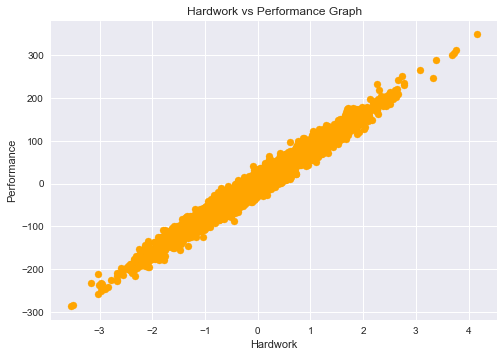

In [27]:
# Load
X = pd.read_csv('./Linear_X_Train.csv')
y = pd.read_csv('./Linear_Y_Train.csv')

# Convert X,Y to Numpy arrays
X = X.values
y = y.values

# Normalisation
u = X.mean()
std = X.std()
X = (X-u)/std


# Visualise
plt.style.use('seaborn')
plt.scatter(X,y,color='orange')
plt.title("Hardwork vs Performance Graph")
plt.xlabel("Hardwork")
plt.ylabel("Performance")
plt.show()

# Linear Regression Model

In [28]:
def hypothesis(x,theta):
    y_ = theta[0] + theta[1]*x
    return y_

def gradient(X,Y,theta):
    m = X.shape[0]
    grad = np.zeros((2,))
    for i in range(m):
        x = X[i]
        y_ = hypothesis(x,theta)
        y = Y[i]
        grad[0] += (y_ - y)
        grad[1] += (y_ - y)*x
    return grad/m

def error(X,Y,theta):
    m = X.shape[0]
    total_error = 0.0
    for i in range(m):
        y_ = hypothesis(X[i],theta)
        total_error += (y_ - Y[i])**2
        
    return (total_error/m)
    

def gradientDescent(X,Y,max_steps=100,learning_rate =0.1):
    
    theta = np.zeros((2,))
    error_list = []
    theta_list = []
    
   
    for i in range(max_steps):
        
        # Compute grad
        grad = gradient(X,Y,theta)
        e = error(X,Y,theta)[0]
        
        
        #Update theta
        theta[0] = theta[0] - learning_rate*grad[0]
        theta[1] = theta[1] - learning_rate*grad[1]
        # Storing the theta values during updates
        theta_list.append((theta[0],theta[1]))
        error_list.append(e)
        
    return theta,error_list,theta_list

In [29]:
theta,error_list,theta_list = gradientDescent(X,y)

In [30]:
theta

array([ 0.6838508 , 79.90361453])

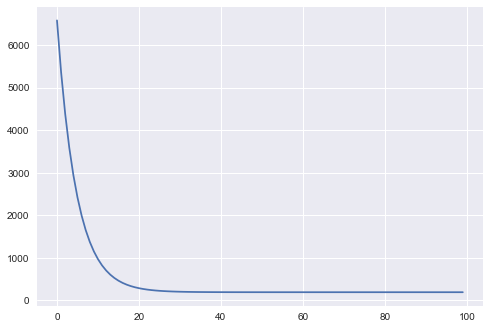

In [31]:
plt.plot(error_list)

In [32]:
error_list

[6576.350052461958,
 5363.12510257493,
 4380.412893166487,
 3584.416003545636,
 2939.6585229527514,
 2417.404963672508,
 1994.379580655529,
 1651.7290204117544,
 1374.1820666143055,
 1149.3690340383696,
 967.2704776518656,
 819.7706469787961,
 700.2957841336078,
 603.5211452290068,
 525.1336877162774,
 461.6398471309695,
 410.2098362568699,
 368.55152744884856,
 334.80829731435097,
 307.47628090540843,
 285.3373476141647,
 267.40481164825667,
 252.87945751587247,
 241.11392066864,
 231.58383582238233,
 223.86446709691378,
 217.6117784292848,
 212.54710060850394,
 208.44471157367238,
 205.12177645545896,
 202.4301990097054,
 200.2500212786461,
 198.48407731648703,
 197.05366270713796,
 195.8950268735658,
 194.95653184837263,
 194.196350877965,
 193.58060429193594,
 193.08184955725244,
 192.67785822215868,
 192.35062524073194,
 192.0855665257771,
 191.87086896666273,
 191.696963943781,
 191.55610087524585,
 191.44200178973418,
 191.34958153046782,
 191.2747211204641,
 191.21408418835924,

In [33]:
theta_list

[(0.06838689680155917, 7.990573694249979),
 (0.12993510392296193, 15.182090019074964),
 (0.18532849033222448, 21.654454711417454),
 (0.23518253810056094, 27.479582934525695),
 (0.2800511810920642, 32.72219833532309),
 (0.3204329597844163, 37.44055219604077),
 (0.3567765606075334, 41.68707067068668),
 (0.3894858013483389, 45.508937297867995),
 (0.41892411801506385, 48.94861726233117),
 (0.44541860301511615, 52.044329230348026),
 (0.4692636395151634, 54.83047000156319),
 (0.49072417236520605, 57.337996695656855),
 (0.5100386519302442, 59.594770720341145),
 (0.5274216835387785, 61.62586734255701),
 (0.5430664119864594, 63.45385430255129),
 (0.5571466675893723, 65.09904256654615),
 (0.5698188976319938, 66.57971200414151),
 (0.5812239046703533, 67.91231449797735),
 (0.5914884110048769, 69.11165674242959),
 (0.600726466705948, 70.19106476243661),
 (0.6090407168369121, 71.16253198044294),
 (0.6165235419547794, 72.03685247664862),
 (0.6232580845608604, 72.82374092323374),
 (0.6293191729063332,

# Predictions and Best Line

In [34]:
y_=hypothesis(X,theta)
print(y_)

[[-19.5733619 ]
 [-43.69571729]
 [ 86.4848761 ]
 ...
 [-20.85044708]
 [138.70197319]
 [-35.87897262]]


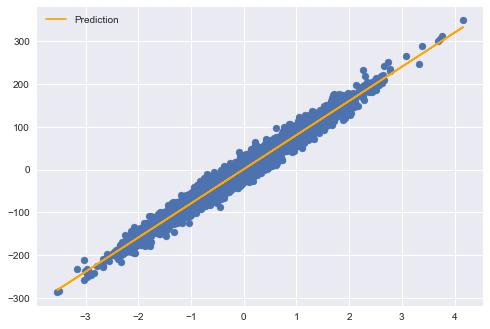

In [35]:
plt.scatter(X,y)
plt.plot(X,y_, color='orange', label="Prediction")
plt.legend()
plt.show()

In [36]:
# hypothesis is the prediction model function

X_test=pd.read_csv("./Linear_X_Test.csv")
Y_test=hypothesis(X_test,theta)

In [37]:
Y_test

,x
0,-149.370696
1,-68.754940
2,-201.486870
3,221.234243
4,47.906897
...,...
1245,-12.744630
1246,75.171802
1247,10.912138
1248,-21.532358


In [38]:
df=pd.DataFrame(data=Y_test, columns=["Y"])

In [39]:
df.to_csv("Y_Prediction.csv", index=False)

# Computing Score

In [40]:
# R2 Score (R Squared Score)

# ((Y-Y_)**2) is a column vector and used instead of iteration.
# in case of numpy array it is better to use column vector
def r2_score(Y,Y_):
    num=np.sum((Y-Y_)**2)
    den=np.sum((Y-Y.mean())**2)
    score=1-num/den
    return score*100


In [41]:
r2_score(y,y_)

97.09612226971643

# Visualising Loss Function, Gradient Descent Trajectory, Theta Updates

In [42]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

In [43]:
theta

array([ 0.6838508 , 79.90361453])

In [44]:
# Loss Actually 
T0 = np.arange(-40,40,1)
T1 = np.arange(40,120,1)

T0,T1 = np.meshgrid(T0,T1)
J = np.zeros(T0.shape)
for i in range(J.shape[0]):
    for j in range(J.shape[1]):
        y_ = T1[i,j]*X + T0[i,j]
        J[i,j] = np.sum((y-y_)**2)/y.shape[0]

#print(J.shape)

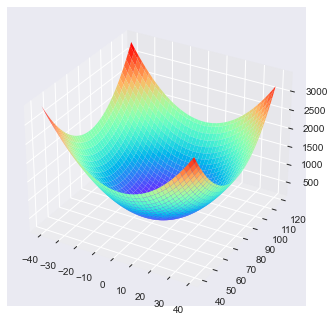

In [45]:
# Visualise the J (Loss)

fig = plt.figure()
axes = fig.gca(projection='3d')
axes.plot_surface(T0,T1,J,cmap='rainbow')
plt.show()

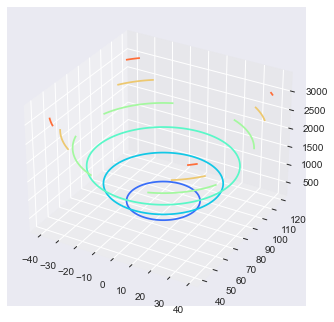

In [46]:
# Contour Plot 
fig = plt.figure()
axes = fig.gca(projection='3d')
axes.contour(T0,T1,J,cmap='rainbow')
plt.show()

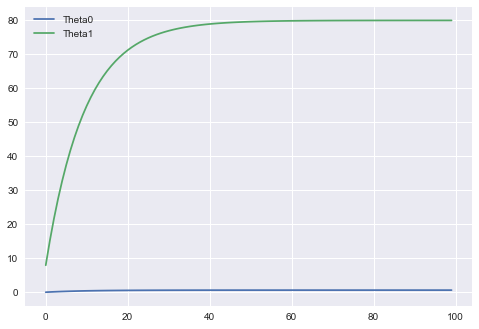

In [47]:
#Plot the changes in values of theta

theta_list = np.array(theta_list)
plt.plot(theta_list[:,0],label="Theta0")
plt.plot(theta_list[:,1],label="Theta1")
plt.legend()
plt.show()

# Trajectory traced by theta updates in loss function

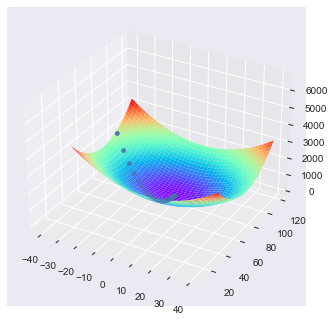

In [48]:
fig = plt.figure()
axes = fig.gca(projection='3d')
axes.plot_surface(T0,T1,J,cmap='rainbow')
axes.scatter(theta_list[:,0],theta_list[:,1],error_list)
plt.show()

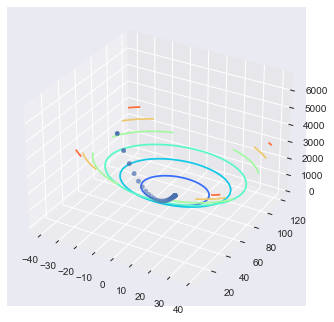

In [49]:
fig = plt.figure()
axes = fig.gca(projection='3d')
axes.contour(T0,T1,J,cmap='rainbow')
axes.scatter(theta_list[:,0],theta_list[:,1],error_list)
plt.show()